In [44]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

(1300,)


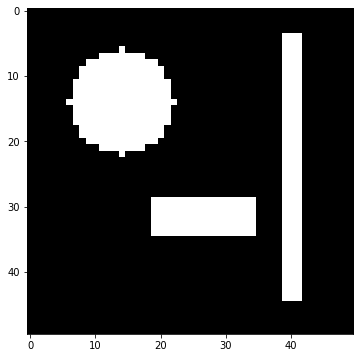

In [133]:
mat_file = scipy.io.loadmat("./data/cs.mat")
#print(type(mat_file))

image = mat_file['img']
#print(image.shape)
x = image.flatten()
#print(x.shape)

lin = 1300
I = np.eye(lin)
#print(I)

A = np.random.randn(lin, image.shape[0]*image.shape[1])
n = np.random.normal(0, 5*I, lin) #std dev is 5
#print(A)
#print(n)
#Ax = np.dot(A, image_flattened)

y = A@x + n
print(y.shape)

plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')

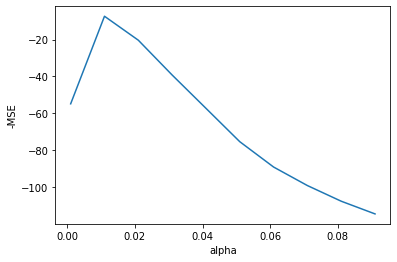

In [143]:
# LASSO for image recovery

mse_list = []
cv_scores = []

for a in np.arange(0.001, 0.1, .01):
    
    lasso = LassoCV(alphas = np.asarray([a]), cv=10, max_iter=10000)
    cv_scores.append(np.mean(cross_val_score(lasso, A, y, cv=10, scoring='neg_mean_squared_error')))
    '''
    model = lasso.fit(A, y)

    lasso_pred = model.predict(A)
    
    
    mse = 0
    for i, pred in enumerate(lasso_pred):
        mse += (y[i] - pred)**2
    mse_list.append(mse)
    '''
    
#plt.plot(mse_list)
plt.plot(np.arange(0.001, 0.1, .01), cv_scores)
plt.xlabel('alpha')
plt.ylabel('-MSE')
plt.show()

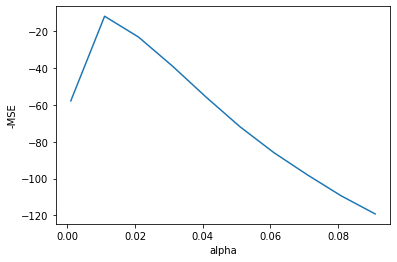

-11.860239987234014
9
0.09099999999999998


In [83]:
#cv_scores_lasso = cv_scores
plt.plot(np.arange(0.001, 0.1, .01), cv_scores_lasso)
plt.xlabel('alpha')
plt.ylabel('-MSE')
plt.show()

print(max(cv_scores_lasso))
print(cv_scores_lasso.index(min(cv_scores_lasso)))
print(np.arange(0.001, 0.1, .01)[cv_scores_lasso.index(min(cv_scores_lasso))])

In [134]:
params = {'alpha':np.arange(0.001, 0.1, .01)}
lasso = Lasso(max_iter=10000)
model = GridSearchCV(lasso, params, cv=10, scoring='neg_mean_squared_error').fit(A, y)
print(model.best_params_)
print(model.best_estimator_.coef_)

{'alpha': 0.011}
[-0.  0.  0. ... -0. -0. -0.]


856


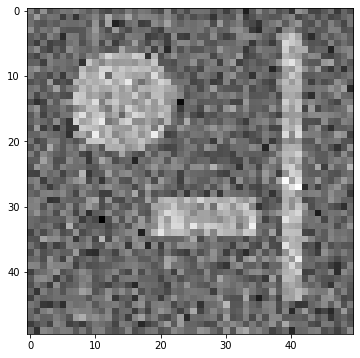

In [135]:
print(np.count_nonzero(model.best_estimator_.coef_))
lasso_recover = model.best_estimator_.coef_.reshape(50,50)
plt.figure(figsize=(6, 6))
plt.imshow(ridge_recover, cmap='gray')

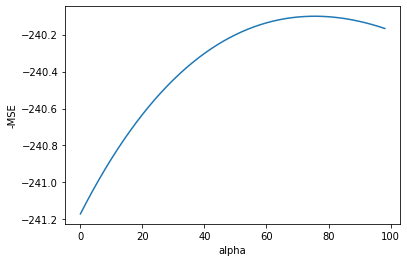

In [141]:
# Ridge for image recovery

mse_list_ridge = []
cv_scores_ridge = []

for a in np.arange(0.1, 100.0, 2.):
    
    ridge = RidgeCV(alphas = np.asarray(a), scoring='neg_mean_squared_error')
    cv_scores_ridge.append(np.mean(cross_val_score(ridge, A, y, cv=10, scoring='neg_mean_squared_error')))
    model = ridge.fit(A, y)
    
    ridge_pred = model.predict(A)
    '''
    mse = 0
    for i, pred in enumerate(ridge_pred):
        mse += (y[i] - pred)**2
    mse_list.append(mse)
    '''

#plt.plot(mse_list_ridge)
plt.plot(np.arange(0.1, 100.0, 2.), cv_scores_ridge)
plt.xlabel('alpha')
plt.ylabel('-MSE')
plt.show()

In [138]:
ridge = RidgeCV(alphas = np.arange(0.1, 100.0, 2.), cv=10, scoring='neg_mean_squared_error').fit(A, y)
print(ridge.alpha_)
print(ridge.coef_)

76.1
[-0.08237144  0.18506914  0.27134021 ... -0.22651803 -0.11673262
  0.04941302]


In [136]:
params = {'alpha':np.arange(0.1, 100.0, 2.)}
ridge = Ridge()
model = GridSearchCV(ridge, params, cv=10, scoring='neg_mean_squared_error').fit(A, y)
print(model.best_params_)
print(model.best_estimator_.coef_)

{'alpha': 76.1}
[-0.08237144  0.18506914  0.27134021 ... -0.22651803 -0.11673262
  0.04941302]


2500


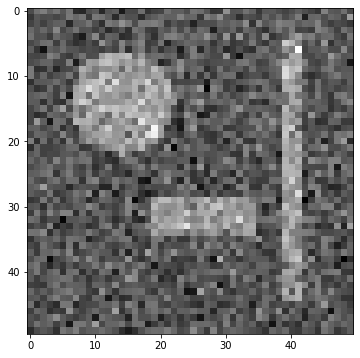

In [139]:
print(np.count_nonzero(ridge.coef_))
ridge_recover = ridge.coef_.reshape(50,50)    #ridge.coef_.reshape(50,50)
plt.figure(figsize=(6, 6))
plt.imshow(ridge_recover, cmap='gray')

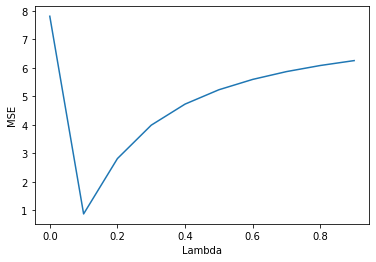

In [176]:
# QUESTION 3

x = np.array([1.5, 1])
x_test = np.array([0.5])
B = np.array([1, 1])
sigma = np.array([2, 1])
y = np.dot(B.T, x)
x2_sig = x_test**2/np.dot(sigma.T, sigma)

#print(x_test**2)
#test
bias_list = []
var_list = []
mse_list = []

for lam in np.arange(0., 1, .1):
    bias = ((x_test*y/np.dot(sigma.T, sigma)) / (x2_sig + lam)) - y
    var = x_test**2 * bias**2
    bias_list.append(bias[0]*bias[0])
    var_list.append(var[0])
    mse_list.append(bias[0]*bias[0] + var[0])

    
plt.plot(np.arange(0., 1, .1), mse_list)
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.show()
#plt.plot(bias_list)
#plt.plot(var_list)
#plt.plot(mse_list)